# Clustering assignment 1 

In [1]:
!ls

people_wiki.csv			    people_wiki_tf_idf.npz	Untitled.ipynb
people_wiki_map_index_to_word.json  people_wiki_word_count.npz


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy.sparse import csr_matrix
%matplotlib inline

In [3]:
wiki=pd.read_csv('people_wiki.csv')
wiki.columns

Index([u'URI', u'name', u'text'], dtype='object')

In [4]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']    
    return csr_matrix( (data, indices, indptr), shape)

In [5]:
word_count = load_sparse_csr('people_wiki_word_count.npz')

In [6]:
map_index_to_word = pd.read_json('people_wiki_map_index_to_word.json',\
                                 typ='dict')
# map_index_to_word=map_index_to_word.to_frame()
map_index_to_word={y:x for x,y in map_index_to_word.iteritems()}
map_index_to_word

{0: u'bioarchaeologist',
 1: u'leaguehockey',
 2: u'electionruss',
 3: u'teramoto',
 4: u'trumpeterpercussionist',
 5: u'spoofax',
 6: u'mendelssohni',
 7: u'crosswise',
 8: u'yec',
 9: u'asianthemed',
 10: u'masheldon',
 11: u'maywoods',
 12: u'feduring',
 13: u'seameo',
 14: u'2012green',
 15: u'wrighthassell',
 16: u'lidda',
 17: u'wfo',
 18: u'ukfang',
 19: u'outfitover',
 20: u'pagbabago',
 21: u'influences1',
 22: u'stonier',
 23: u'brbbarbosa',
 24: u'ipishuna',
 25: u'researchteuvo',
 26: u'stephensens',
 27: u'titheridge',
 28: u'dunlapi',
 29: u'specs',
 30: u'komozi',
 31: u'fajita',
 32: u'sauvagein',
 33: u'brilliantmusik',
 34: u'glickenhaus',
 35: u'23seat',
 36: u'selfloading',
 37: u'tankians',
 38: u'333465389',
 39: u'reviewsbarasch',
 40: u'89195',
 41: u'arrestedon',
 42: u'confisses',
 43: u'unclog',
 44: u'newbies',
 45: u'mcin',
 46: u'ecosocial',
 47: u'sumiswald',
 48: u'deleriums',
 49: u'trochim',
 50: u'darkenedfrom',
 51: u'91ydsprofessional',
 52: u'yorkc

In [7]:
word_count

<59071x547979 sparse matrix of type '<type 'numpy.int64'>'
	with 10379283 stored elements in Compressed Sparse Row format>

In [8]:
%%time
from sklearn.neighbors import NearestNeighbors
model =NearestNeighbors(metric='euclidean', algorithm='brute')
model.fit(word_count)

CPU times: user 144 ms, sys: 32 ms, total: 176 ms
Wall time: 166 ms


In [9]:
wiki[wiki['name']=='Barack Obama']

,URI,name,text
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...


In [10]:
distances, indicies = model.kneighbors(word_count[35817],\
                                       n_neighbors=10)

In [11]:
neighbours=pd.DataFrame({'distance': distances[0], 'id': indicies[0],\
                        'name':wiki.loc[indicies[0]]['name']})
neighbours.sort_values('distance')

,distance,id,name
35817,0.000000,35817,Barack Obama
24478,33.075671,24478,Joe Biden
28447,34.394767,28447,George W. Bush
35357,36.152455,35357,Lawrence Summers
14754,36.166283,14754,Mitt Romney
13229,36.331804,13229,Francisco Barrio
31423,36.400549,31423,Walter Mondale
22745,36.496575,22745,Wynn Normington Hugh-Jones
36364,36.633318,36364,Don Bonker
9210,36.959437,9210,Andy Anstett


In [12]:
def unpack_dict(matrix, map_index_to_word):
#     table = list(map_index_to_word.sort_values())
    # if you're not using SFrame, replace this line with
    #table = sorted(map_index_to_word, key=map_index_to_word.get)
    table=map_index_to_word
    
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]

    return [{k:v for k,v in zip([table[word_id] for word_id in\
                                 indices[indptr[i]:indptr[i+1]] ],
                                 data[indptr[i]:indptr[i+1]].tolist())} \
               for i in xrange(num_doc) ]

wiki['word_count'] = unpack_dict(word_count, map_index_to_word)

In [13]:
wiki

,URI,name,text,word_count
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{u'selection': 1, u'carltons': 1, u'being': 1,..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{u'precise': 1, u'thomas': 1, u'they': 1, u'di..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{u'just': 1, u'issued': 1, u'mainly': 1, u'nom..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{u'all': 1, u'bauforschung': 1, u'just': 1, u'..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{u'legendary': 1, u'gangstergenka': 1, u'legen..."
5,<http://dbpedia.org/resource/Sam_Henderson>,Sam Henderson,sam henderson born october 18 1969 is an ameri...,"{u'now': 1, u'since': 1, u'less': 1, u'being':..."
6,<http://dbpedia.org/resource/Aaron_LaCrate>,Aaron LaCrate,aaron lacrate is an american music producer re...,"{u'exclusive': 2, u'played': 1, u'producer': 1..."
7,<http://dbpedia.org/resource/Trevor_Ferguson>,Trevor Ferguson,trevor ferguson aka john farrow born 11 novemb...,"{u'taxi': 1, u'salon': 1, u'gangs': 1, u'being..."
8,<http://dbpedia.org/resource/Grant_Nelson>,Grant Nelson,grant nelson born 27 april 1971 in london also...,"{u'houston': 1, u'frankie': 1, u'labels': 1, u..."
9,<http://dbpedia.org/resource/Cathy_Caruth>,Cathy Caruth,cathy caruth born 1955 is frank h t rhodes pro...,"{u'phenomenon': 1, u'deborash': 1, u'innovativ..."


In [16]:
def top_words(name):
    """
    Get a table of the most frequent words in the given \
    person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table=pd.DataFrame()
    word_count_table['word'] = row.iloc[0]['word_count'].keys()
    word_count_table['count'] = row.iloc[0]['word_count'].values()
    return word_count_table.sort_values('count',ascending=False)
obama_words = top_words('Barack Obama')
print obama_words

barrio_words = top_words('Francisco Barrio')
print barrio_words

                word  count
23               the     40
215               in     30
138              and     21
127               of     18
161               to     14
37               his     11
189            obama      9
133              act      8
156               he      7
260                a      7
62                us      6
221               as      6
99               law      6
173              was      5
208          control      4
256        president      4
249            after      4
88               for      4
134         military      4
157             iraq      4
270       democratic      4
30               has      4
197           signed      3
113           states      3
158             from      3
41              term      3
243            party      3
31              2011      3
81          election      3
72            senate      3
..               ...    ...
154            total      1
117          address      1
115              job      1
114             lgbt

In [17]:
combined_words=obama_words.merge(barrio_words,on='word')
combined_words.columns=['word' , 'obama', 'barrio']


In [18]:
obama_words.head()

,word,count
23,the,40
215,in,30
138,and,21
127,of,18
161,to,14


In [19]:
common_words = set(obama_words.head()['word']) # YOUR CODE HERE
def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())   # YOUR CODE HERE
    # return True if common_words is a subset of unique_words
    # return False otherwise
#     print len(unique_words)
    return  common_words.issubset(unique_words) # YOUR CODE HERE

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question


In [20]:
print 'Output from your function:', has_top_words(wiki.iloc[32]['word_count'])
print 'Correct output: True'
print 'Also check the length of unique_words. It should be 167'

print 'Output from your function:', has_top_words(wiki.iloc[33]['word_count'])
print 'Correct output: False'
print 'Also check the length of unique_words. It should be 188'

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167
Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188


In [21]:
len(wiki)

59071

In [22]:
print wiki['has_top_words'].sum()

56066


In [23]:
bush_words=top_words('George W. Bush')


In [24]:
combined_words=obama_words.merge(bush_words,on='word')
combined_words.columns=['word' , 'obama', 'bush']

In [25]:
combined_words

,word,obama,bush
0,the,40,39
1,in,30,22
2,and,21,14
3,of,18,14
4,to,14,11
5,his,11,6
6,act,8,3
7,he,7,8
8,a,7,6
9,as,6,6


In [26]:
from sklearn.metrics.pairwise import euclidean_distances
obamaidx=wiki[wiki['name']=='Barack Obama']
obamaidx=obamaidx.index
bidenidx=wiki[wiki['name']=='Joe Biden'].index
bushidx=wiki[wiki['name']=='George W. Bush'].index
euclid=euclidean_distances(word_count[obamaidx],word_count[bidenidx])
euclid2=euclidean_distances(word_count[obamaidx],word_count[bushidx])
euclid3=euclidean_distances(word_count[bidenidx],word_count[bushidx])
print euclid,euclid2,euclid3

[[ 33.07567082]] [[ 34.39476704]] [[ 32.75667871]]


## TF-IDF

In [136]:
tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')

In [137]:
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word)

In [139]:
tf_idf

<59071x547979 sparse matrix of type '<type 'numpy.float64'>'
	with 10379283 stored elements in Compressed Sparse Row format>

In [140]:
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [141]:
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [147]:
neighbours=pd.DataFrame({'distance': distances[0], 'id': indices[0],\
                        'name':wiki.loc[indices[0]]['name']})

In [148]:
neighbours.sort_values('distance')

,distance,id,name
35817,0.000000,35817,Barack Obama
7914,106.861014,7914,Phil Schiliro
46811,108.871674,46811,Jeff Sessions
44681,109.045698,44681,Jesse Lee (politician)
38376,109.108106,38376,Samantha Power
6507,109.781867,6507,Bob Menendez
38714,109.957788,38714,Eric Stern (politician)
44825,110.413889,44825,James A. Guest
44368,110.470609,44368,Roland Grossenbacher
33417,110.696998,33417,Tulsi Gabbard


In [152]:
def top_words_tf_idf(name):
    """
    Get a table of the most frequent words in the given \
    person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table=pd.DataFrame()
    word_count_table['word'] = row.iloc[0]['tf_idf'].keys()
    word_count_table['count'] = row.iloc[0]['tf_idf'].values()
    return word_count_table.sort_values('count',ascending=False)

In [153]:
obama_tf_idf = top_words_tf_idf('Barack Obama')
print obama_tf_idf.head()

schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
print schiliro_tf_idf.head()

        word      count
189    obama  43.295653
133      act  27.678223
157     iraq  17.747379
208  control  14.887061
99       law  14.722936
                word      count
16          schiliro  21.972991
8              staff  15.856442
87     congressional  13.547088
104  daschleschiliro  10.986495
83             obama   9.621256


In [154]:
combined_words=obama_tf_idf.merge(schiliro_tf_idf,on='word')
combined_words.columns=['word','obama','schiliro']
combined_words

,word,obama,schiliro
0,obama,43.295653,9.621256
1,law,14.722936,7.361468
2,democratic,12.410689,6.205344
3,senate,10.164288,3.388096
4,presidential,7.386955,3.693478
5,president,7.226869,9.033587
6,policy,6.095386,3.047693
7,states,5.473201,1.824400
8,office,5.248173,2.624086
9,2011,5.107041,3.404694


In [157]:
common_words= set(combined_words.head()['word'])

In [158]:
wiki['has_top_words']=wiki['word_count'].apply(has_top_words)

In [159]:
wiki['has_top_words'].sum()

14

In [165]:
from sklearn.metrics.pairwise import euclidean_distances
obamaidx=wiki[wiki['name']=='Barack Obama']
obamaidx=obamaidx.index
bidenidx=wiki[wiki['name']=='Joe Biden'].index
euclid=euclidean_distances(tf_idf[obamaidx],tf_idf[bidenidx])
print euclid

[[ 123.29745601]]


In [182]:
def compute_length(row):
    return len(row.split())
# print wiki.iloc[0]['text'].split(' ')
wiki['length'] = wiki['text'].apply(compute_length)
# Compute 100 nearest neighbors and display their lengths
distances, indices = model_tf_idf.kneighbors(tf_idf[35817],\
                                             n_neighbors=100)
neighbors = pd.DataFrame({'distance': distances[0],'id': indices[0]})
print neighbors

      distance     id
0     0.000000  35817
1   106.861014   7914
2   108.871674  46811
3   109.045698  44681
4   109.108106  38376
5   109.781867   6507
6   109.957788  38714
7   110.413889  44825
8   110.470609  44368
9   110.696998  33417
10  110.730547  49944
11  111.039450   7950
12  111.061971   6796
13  111.102213  38495
14  111.219609  42859
15  111.220666  52242
16  111.287834  40099
17  111.338901  18125
18  111.442101  56008
19  111.457553  44227
20  111.547335  31470
21  111.603622   8339
22  111.638149   7653
23  111.734167  55388
24  111.812003  21838
25  111.984531  35186
26  112.126885  18542
27  112.170177  47129
28  112.213494  11378
29  112.229270  51114
..         ...    ...
70  113.355265  57512
71  113.362435   8184
72  113.372188  40855
73  113.384932  51599
74  113.396857  25148
75  113.399465   4118
76  113.431170  55044
77  113.490864   1318
78  113.501689  58229
79  113.526727  41355
80  113.526939  57051
81  113.588332  10378
82  113.618306  10515
83  113.63

In [193]:
nearest_neighbors_euclidean =pd.DataFrame({'distance': distances[0], 'id': indices[0],\
                                           'name':wiki.loc[indices[0]]['name'], 'length':wiki.loc[indices[0]]['length']})


In [194]:
nearest_neighbors_euclidean

,distance,id,length,name
35817,0.000000,35817,540,Barack Obama
7914,106.861014,7914,208,Phil Schiliro
46811,108.871674,46811,230,Jeff Sessions
44681,109.045698,44681,216,Jesse Lee (politician)
38376,109.108106,38376,310,Samantha Power
6507,109.781867,6507,220,Bob Menendez
38714,109.957788,38714,255,Eric Stern (politician)
44825,110.413889,44825,215,James A. Guest
44368,110.470609,44368,201,Roland Grossenbacher
33417,110.696998,33417,228,Tulsi Gabbard


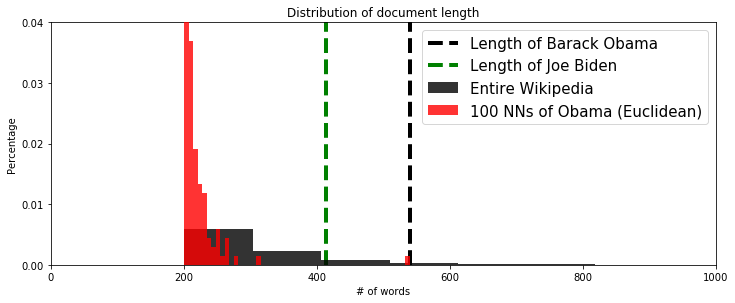

In [196]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'].iloc[0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'].iloc[0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [197]:
model2_tf_idf = NearestNeighbors(algorithm='brute', metric='cosine')
model2_tf_idf.fit(tf_idf)
distances, indices = model2_tf_idf.kneighbors(tf_idf[35817],
                                              n_neighbors=100)  
nearest_neighbors_cosine=pd.DataFrame({'distance': distances[0], 'id': indices[0],\
                                           'name':wiki.loc[indices[0]]['name'], 'length':wiki.loc[indices[0]]['length']})
nearest_neighbors_cosine

,distance,id,length,name
35817,0.000000,35817,540,Barack Obama
24478,0.703139,24478,414,Joe Biden
38376,0.742982,38376,310,Samantha Power
57108,0.758358,57108,580,Hillary Rodham Clinton
38714,0.770561,38714,255,Eric Stern (politician)
46140,0.784678,46140,257,Robert Gibbs
6796,0.788039,6796,232,Eric Holder
44681,0.790926,44681,216,Jesse Lee (politician)
18827,0.798323,18827,279,Henry Waxman
2412,0.799466,2412,217,Joe the Plumber


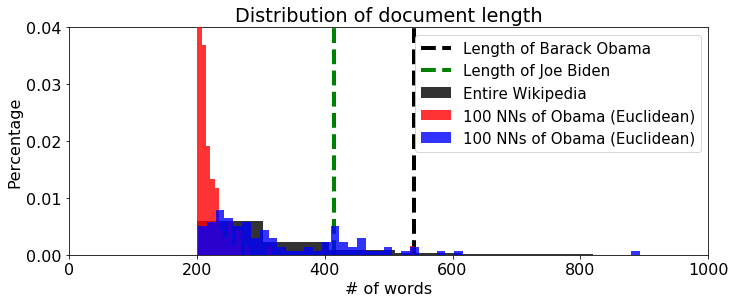

In [200]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'].iloc[0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'].iloc[0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()